Fashion MNIST（服饰数据集）的作用是经典MNIST数据集的简易替换，MNIST数据集包含手写数字（阿拉伯数字）的图像，两者图像格式及大小都相同。Fashion MNIST比常规 MNIST手写数据将更具挑战性。两者数据集都较小，主要适用于初学者学习或验证某个算法可否正常运行。他们是测试和调试代码的良好起点。

In [28]:
'''
Fashion MNIST/服饰数据集包含70000张灰度图像，其中包含60,000个示例的训练集和10,000个示例的测试集，
每个示例都是一个28x28灰度图像，分为以下几类：
Label	Description
0	T恤（T-shirt/top）
1	裤子（Trouser）
2	套头衫（Pullover）
3	连衣裙（Dress）
4	外套（Coat）
5	凉鞋（Sandal）
6	衬衫（Shirt）
7	运动鞋（Sneaker）
8	包（Bag）
9	靴子（Ankle boot）
'''

'\nFashion MNIST/服饰数据集包含70000张灰度图像，其中包含60,000个示例的训练集和10,000个示例的测试集，\n每个示例都是一个28x28灰度图像，分为以下几类：\nLabel\tDescription\n0\tT恤（T-shirt/top）\n1\t裤子（Trouser）\n2\t套头衫（Pullover）\n3\t连衣裙（Dress）\n4\t外套（Coat）\n5\t凉鞋（Sandal）\n6\t衬衫（Shirt）\n7\t运动鞋（Sneaker）\n8\t包（Bag）\n9\t靴子（Ankle boot）\n'

# 1.首先导入常用的模块，以便对数据进行分析

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

# 配置 Matplotlib 使用中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

#加载训练和测试数据
path = Path('../课程-机器学习/archive')
train_df = pd.read_csv(filepath_or_buffer = path/'fashion-mnist_train.csv')
test_df = pd.read_csv(path/'fashion-mnist_test.csv')

## 输出训练集前五行数据

In [30]:
print(train_df.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

## 数据基本信息

In [31]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None


### 其中：60000行，785列，label表示标签，pixel表示图像像素值784个对应28*28，dtypes表示所有785列数据类型都是'int64',memory usage表示占用内存

## 统计分析

### 训练集的形状

In [32]:
print(f'Train shape: {train_df.shape}')

Train shape: (60000, 785)


### 统计每一类别的样本数

In [33]:
train_labels = train_df['label']
test_labels = test_df['label']

In [34]:
print("Train label distribution:\n{}".format(train_labels.value_counts()))

Train label distribution:
label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64


### 类别名映射

In [35]:
class_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 可视化数据

## 数据类别分类可视化

#训练集类别分布
plt.figure(figsize=(10,6))#设置绘图区域大小
sns.countplot(test_labels)#绘制类别分布的条形图
plt.title("Test data")#设置标签
plt.xlabel('Label')
plt.ylabel('Count')
#设置x轴刻度标签和旋转角度
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 样本数据可视化

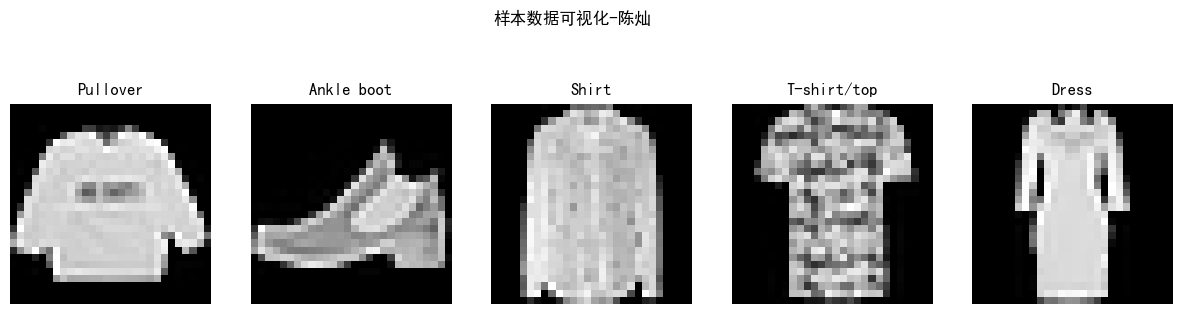

In [48]:
#dat包含样本数据的DataFrame，labels数据对应的标签Series,n要显示的样本数量
def showsamples(data,labels,n=10):
    plt.figure(figsize=(15,4))#创建图像窗口
    for i in range(n):
        plt.subplot(1,n,i+1)#创建1行n列的子图，并定位到第i+1个子图
        img = data.iloc[i,1:].values.reshape(28,28)#获取第i行的数据，从第二列开始，并将其重塑为28*28的二维数组
        plt.imshow(img,cmap = 'gray')#以灰度图形式显示图像数据
        plt.title(class_names[labels.iloc[i]])#设置子图的标题为对应类别的名称
        plt.axis('off')#隐藏坐标轴
    plt.suptitle("样本数据可视化-陈灿")
    plt.show()#显示图形
showsamples(train_df,train_labels,n=5)

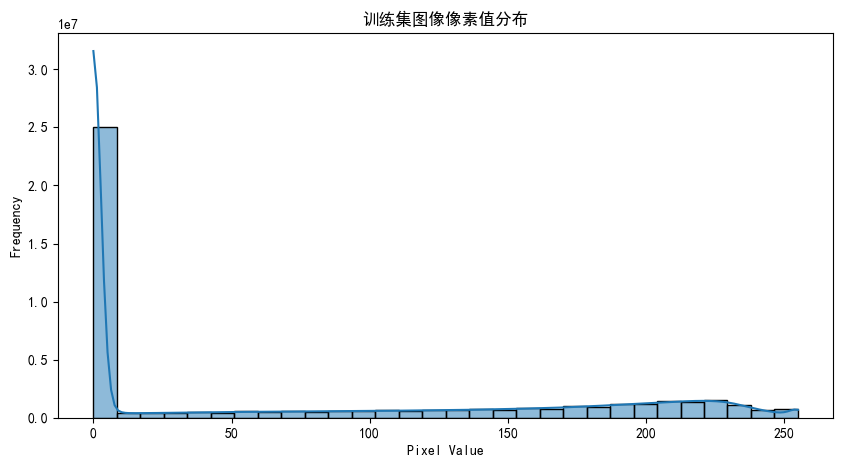

In [37]:
# 图像像素值分布可视化
def plot_pixel_distribution(data, title):
    plt.figure(figsize=(10, 5))
    sns.histplot(data.values.flatten(), bins=30, kde=True)
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# 训练集图像像素值分布
plot_pixel_distribution(train_df, '训练集图像像素值分布-陈灿')


## 数据预处理与标准化，以便输入CNN网络

In [38]:
#提取训练和测试数据中的图像像素值进行标准化
#iloc去所有行的第2列到最后一列，.values转换为numpy数组，/255.0对像素值进行标准化到0-1间，加快训练速度
#train_df['label'].values将label列的所有值作为标签赋值给y轴，并将其转换为numpy数组
x_train = train_df.iloc[:,1:].values /255.0
y_train = train_df['label'].values

x_test = test_df.iloc[:,1:].values / 255.0
y_test = test_df['label'].values

#重塑为符合cnn输入要求的形状[样本数，通道数，高度，宽度]
#-1自动计算维度大小，使总元素数量保持不变，1表示通道数1，即为灰度图，28，28高度宽度28
x_train = x_train.reshape(-1,1,28,28)
x_test = x_test.reshape(-1,1,28,28)
#输出数据结构，进行验证
print("x_train shape:{}".format(x_train.shape))
print("x_test shape:{}".format(x_test.shape))

x_train shape:(60000, 1, 28, 28)
x_test shape:(10000, 1, 28, 28)


## 加载数据，转换为pytorch张量，定义CNN神经网络执行过程

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader,TensorDataset
#转换为Pytorch张量
#torch.tensor将标准化后的数据转换为pytorch的float32类型张量，兼顾精度和性能
x_train_tensor = torch.tensor(x_train,dtype = torch.float32)
y_train_tensor = torch.tensor(y_train,dtype = torch.long)
x_test_tensor = torch.tensor(x_test,dtype = torch.float32)
y_test_tensor = torch.tensor(y_test,dtype = torch.long)

#创建Dataloader
#将输入张量和标签张量封装为ptorch的TensorDataset，数据集可以与DataLoader一起使用
train_dataset = TensorDataset(x_train_tensor,y_train_tensor)
test_dataset = TensorDataset(x_test_tensor,y_test_tensor)

#batch_size表示每次从数据集中读取64个样本,shuffle=true数据会被随机打乱，False不打乱
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=64,shuffle=False)

# 批处理（Batch Processing）:将数据分成小批次处理，减少内存占用，提高训练速度。
# 数据打乱（Shuffle）:
# 训练集打乱：避免模型学习到数据的顺序性，提高模型的泛化能力。
# 测试集不打乱：保持数据顺序一致，确保测试结果的可重复性。


class CNN(nn.Module):#继承
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)#卷积层，输入通道数为1，输出通道数为32卷积核大小为3*3,填充为一
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)#输入通道数为32，输出通道数为64，
        self.pool = nn.MaxPool2d(2, 2)#2*2的最大池化层，步幅 (stride): 2，将特征图尺寸缩小一半
        self.fc1 = nn.Linear(64 * 7 * 7, 128)#全连接层，将输入尺寸 64 * 7 * 7 转换为 128输出。
        self.fc2 = nn.Linear(128, 10)#将输入尺寸 128 转换为 10（对应 10 个类别）输出。
    def forward(self,x):
        #输入数据 x 通过第一个卷积层 conv1。
        #应用 ReLU 激活函数 F.relu，引入非线性。
        #通过最大池化层 pool，降低特征图尺寸。      进行两次
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  #将特征图展平成一维向量，以便输入全连接层。  -1: 让 PyTorch 自动计算批次大小
        x = F.relu(self.fc1(x))   #经过第一个全连接层 fc1。  应用 ReLU 激活函数 F.relu
        x = self.fc2(x)          #经过第二个全连接层 fc2，输出为 10 维向量（对应 10 个类别）
        return x   #返回最终输出的类别得分

In [40]:
'''模型结构总结：
输入: 1x28x28 的灰度图像。
卷积层 + ReLU + 池化:
1x28x28 → 32x28x28 → 32x14x14。
卷积层 + ReLU + 池化:
32x14x14 → 64x14x14 → 64x7x7。
展平: 64x7x7 → 3136。
全连接层 + ReLU: 3136 → 128。
全连接层: 128 → 10。
输出: 10 类别得分。'''

'模型结构总结：\n输入: 1x28x28 的灰度图像。\n卷积层 + ReLU + 池化:\n1x28x28 → 32x28x28 → 32x14x14。\n卷积层 + ReLU + 池化:\n32x14x14 → 64x14x14 → 64x7x7。\n展平: 64x7x7 → 3136。\n全连接层 + ReLU: 3136 → 128。\n全连接层: 128 → 10。\n输出: 10 类别得分。'

## 定义模型训练函数

In [41]:
#定义如何在训练数据集上训练一个神经网络模型，包括前向传播、计算损失、反向传播和优化模型参数。
'''
model：需要训练的神经网络模型（实例）。
device：设备（CPU 或 GPU），用于加速计算。
train_loader：DataLoader 对象，提供批量的训练数据。
optimizer：优化器，用于更新模型的参数。
epoch：当前训练的轮数（用于打印和记录）。
'''
def train(model,device,train_loader,optimizer,epoch,train_losses, train_accuracies):
    model.train()       #设置模型为训练模式
    train_loss = 0
    correct = 0
    
    #从 train_loader 中获取每批次的数据和标签，并移动到指定设备
    for batch_idx,(data,target) in enumerate(train_loader):
        #batch_idx 是批次索引，data 是输入数据，target 是对应的标签
        data, target = data.to(device),target.to(device)
        optimizer.zero_grad()       #在每次反向传播前，清除上一次计算的梯度。避免梯度累加，影响更新
        output = model(data)       #将输入数据传入模型，计算输出（预测）
        loss = F.cross_entropy(output,target)        #F.cross_entropy 是 PyTorch 提供的交叉熵损失函数,使用交叉熵损失函数比较模型输出与目标标签
        loss.backward()         #反向传播：计算损失相对于模型参数的梯度
        optimizer.step()           #更新模型参数：使用计算得到的梯度，按优化算法更新模型参数。
        train_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        
        # if batch_idx % 100 == 0:
        #     print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
        #           f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
    avg_loss = train_loss / len(train_loader)
    accuracy = 100. * correct / len(train_loader.dataset)
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)
    print(f'Train Epoch: {epoch} Loss: {avg_loss:.4f} Accuracy: {correct}/{len(train_loader.dataset)} ({accuracy:.2f}%)')

## 定义模型测试函数

In [42]:
'''
评估模型性能：在测试数据集上评估模型的表现，包括计算损失和准确率。
函数参数:
model：需要测试的神经网络模型（实例）。
device：设备（CPU 或 GPU），用于加速计算。
test_loader：DataLoader 对象，提供批量的测试数据。
'''
def test(model,device,test_loader, test_losses, test_accuracies):
    model.eval()   #评估模式
    test_loss = 0
    correct = 0
    with torch.no_grad():  #禁用梯度计算,减少内存消耗，加速计算
        for data,target in test_loader:
            data,target = data.to(device),target.to(device)
            output = model(data)
            
            #累加损失：计算批量的交叉熵损失，并累加到 test_loss 中。
            #reduction='sum' 表示对批量内所有样本的损失求和
            test_loss += F.cross_entropy(output,target, reduction = 'sum').item()
            
            pred = output.argmax(dim = 1,keepdim=True)   #获取预测标签
            #累加正确预测的数量,将预测与真实标签进行比较，累加预测正确的样本数
            correct += pred.eq(target.view_as(pred)).sum().item()
            
        test_loss /= len(test_loader.dataset)#计算平均损失
        accuracy = 100. * correct / len(test_loader.dataset)
        test_losses.append(test_loss)
        test_accuracies.append(accuracy)
        print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)\n')

## 为了方便保存模型和在未来的训练或测试中重新加载模型，使用 PyTorch 提供的 torch.save 和 torch.load 函数。保存模型

In [43]:
import os

# 保存模型
def save_model(model, path='model.pth'):
    torch.save(model.state_dict(), path)
    print(f'Model saved to {path}')

# 加载模型
def load_model(model, path='model.pth', device='cpu'):
    model.load_state_dict(torch.load(path, map_location=device))
    model.to(device)
    print(f'Model loaded from {path}')

## 整体训练和测试流程

Model loaded from fashion_mnist_cnn.pth

Test set: Average loss: 0.2294, Accuracy: 9264/10000 (92.64%)



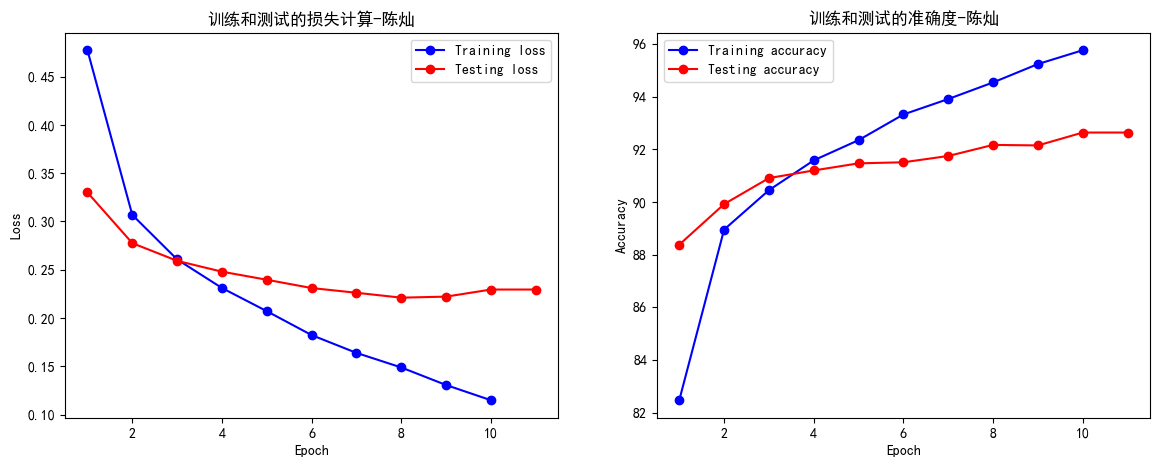

In [46]:
from IPython.display import clear_output, display

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Use:"+ str(device))
model = CNN().to(device)   #创建 CNN 模型实例，并将其移动到指定设备
optimizer = optim.Adam(model.parameters(),lr=0.001)  #使用 Adam 优化器，设置学习率
# 定义训练和测试的轮次
num_epochs = 10
model_save_path = 'fashion_mnist_cnn.pth'
best_accuracy = 0.0

# 用于存储训练和测试过程的损失和准确率
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [],[]

# 设置 Matplotlib 进行动态绘图
plt.ion()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# 训练和测试循环
for epoch in range(1,num_epochs + 1):
    train(model,device,train_loader,optimizer,epoch, train_losses, train_accuracies)
    test(model,device,test_loader,test_losses, test_accuracies)

    # 清理输出并显示新的图表
    clear_output(wait=True)
    ax1.clear()
    
    ax1.plot(range(1, epoch + 1), train_losses, 'bo-', label='Training loss')
    ax1.plot(range(1, epoch + 1), test_losses, 'ro-', label='Testing loss')
    ax1.set_title('Training and Testing Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    ax2.clear()
    ax2.plot(range(1, epoch + 1), train_accuracies, 'bo-', label='Training accuracy')
    ax2.plot(range(1, epoch + 1), test_accuracies, 'ro-', label='Testing accuracy')
    ax2.set_title('Training and Testing Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    display(fig)
    plt.pause(0.001)
    
    
    #比较每次训练的结果，保存效果更好的模型
    if test_accuracies[-1] > best_accuracy:
        best_accuracy = test_accuracies[-1]
        save_model(model,model_save_path)
clear_output(wait=True)

# 在测试前加载最优模型
load_model(model, model_save_path, device)
test(model, device, test_loader,test_losses, test_accuracies)


# 最后绘制完整的图表
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(range(1, len(train_losses) + 1), train_losses, 'bo-', label='Training loss')
ax1.plot(range(1, len(test_losses) + 1), test_losses, 'ro-', label='Testing loss')
ax1.set_title('训练和测试的损失计算-陈灿')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, 'bo-', label='Training accuracy')
ax2.plot(range(1, len(test_accuracies) + 1), test_accuracies, 'ro-', label='Testing accuracy')
ax2.set_title('训练和测试的准确度-陈灿')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()